In [1]:
import sys

sys.path.append("../")

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from hms_pipeline.preproc import *

## Raw EEG

[1628180742 2277392603  722738444  387987538 2175806584 1626798710
 2529955608 1202099836 3037445252 2289322082]
eeg_id                               839643180
eeg_sub_id                                  80
eeg_label_offset_seconds                 404.0
spectrogram_id                        12849827
spectrogram_sub_id                         177
spectrogram_label_offset_seconds        1426.0
label_id                            1814836842
patient_id                               34998
expert_consensus                           GPD
seizure_vote                                 0
lpd_vote                                     0
gpd_vote                                     4
lrda_vote                                    0
grda_vote                                    0
other_vote                                   1
Name: 605, dtype: object
LL (31600, 4)
RL (31600, 4)
LP (31600, 4)
RP (31600, 4)
ML (31600, 2)
LL (6320, 4)
RL (6320, 4)
LP (6320, 4)
RP (6320, 4)
ML (6320, 2)
(256, 25280)


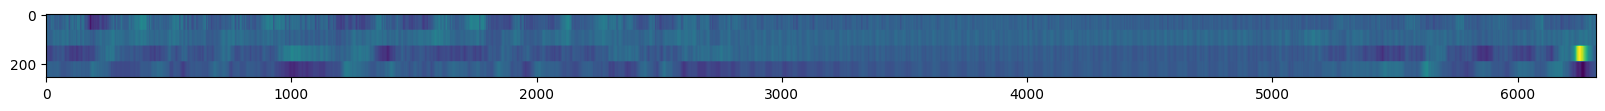

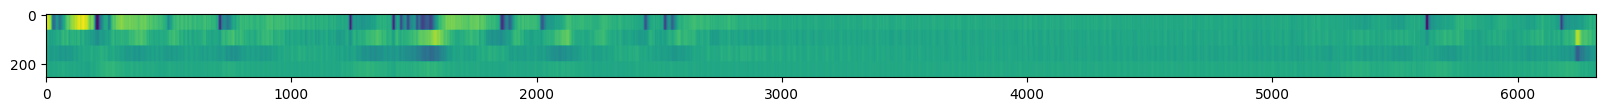

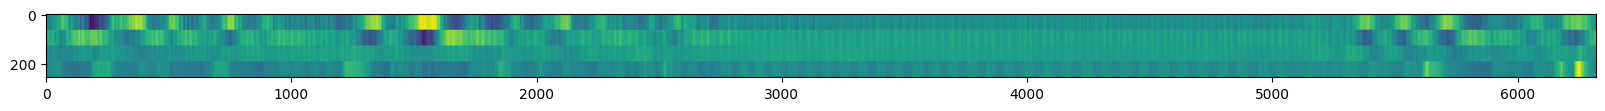

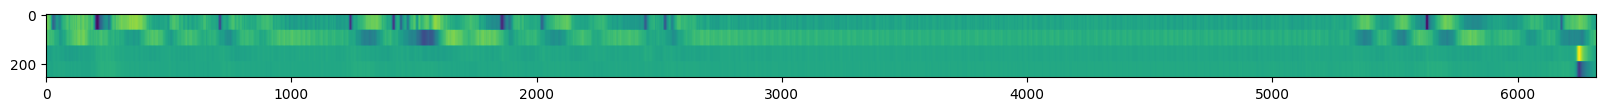

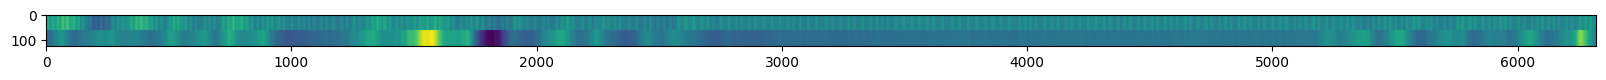

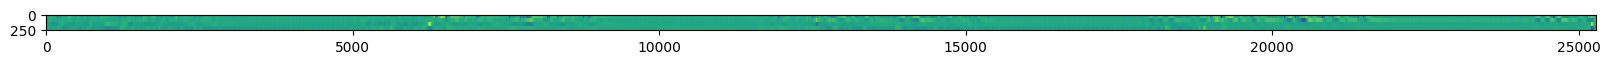

In [17]:
eeg_dir = "/home/maxc/workspace/kaggle-hms/hms-harmful-brain-activity-classification/train_eegs"
train_df_path = "/home/maxc/workspace/kaggle-hms/hms-harmful-brain-activity-classification/train.csv"
train_df = pd.read_csv(train_df_path)

test_eeg_list = train_df["eeg_id"].unique()[:10]
test_spec_list = train_df["spectrogram_id"].unique()[:10]
print(test_eeg_list)


test_eeg_dir = "/home/maxc/workspace/kaggle-hms/hms-harmful-brain-activity-classification/train_eegs"

sample_row = train_df.sample().iloc[0]
print(sample_row)
test_long_spec_dir = "/home/maxc/workspace/kaggle-hms/hms-harmful-brain-activity-classification/train_spectrograms"

# random select a spectrogram from the list

test_eeg = sample_row["eeg_id"]
test_eeg = 2108478615
test_eeg = 1661408834

test_eeg_path = os.path.join(test_eeg_dir, str(test_eeg) + ".parquet")
eeg_dict = load_raw_eeg(test_eeg_path, filter=None)

for key in eeg_dict.keys():
    print(key, eeg_dict[key].shape)

resized_eeg = resize_eeg_dict(eeg_dict, 40)


stacked_img = []
for key in resized_eeg.keys():
    print(key, resized_eeg[key].shape)
    # plot the img
    img = resized_eeg[key].T
    plt.figure(figsize=(20, 10))
    img = np.repeat(img, 64, axis=0)
    if key!="ML":
        stacked_img.append(img)
    plt.imshow(img)

stacked_img = np.hstack(stacked_img)

plt.figure(figsize=(20, 10))
plt.imshow(stacked_img)
print(stacked_img.shape)


In [4]:
test_raw_eeg_output_dir = "/home/maxc/workspace/kaggle-hms/data/test_preproc/raw_eegs"

preprocess_raw_eeg_list(eeg_dir, test_eeg_list, test_raw_eeg_output_dir, filter_type="bandpass", sub_width=500)

{'filter_type': 'bandpass', 'freq': 10, 'sub_width': 500, 'norm_type': 'global', 'highcut': 20}


100%|██████████| 10/10 [00:00<00:00, 120.79it/s]


## Long Spec

eeg_id                              1624010390
eeg_sub_id                                   0
eeg_label_offset_seconds                   0.0
spectrogram_id                      1307728870
spectrogram_sub_id                           0
spectrogram_label_offset_seconds           0.0
label_id                            3705160711
patient_id                                  56
expert_consensus                         Other
seizure_vote                                 0
lpd_vote                                     0
gpd_vote                                     0
lrda_vote                                    0
grda_vote                                    0
other_vote                                   1
Name: 64855, dtype: object
1307728870
LL (100, 492)
RL (100, 492)
LP (100, 492)
RP (100, 492)
LL (112, 492)
-1.0 0.17365332
RL (112, 492)
-1.0 0.21961574
LP (112, 492)
-1.0 0.21695948
RP (112, 492)
-1.0 0.25308636


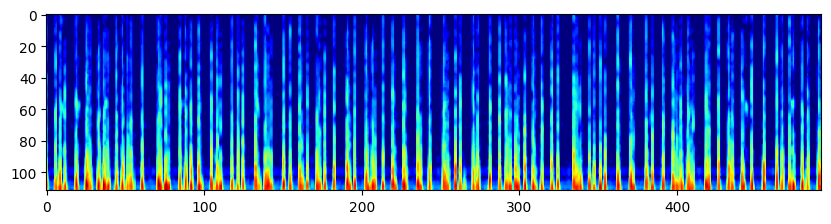

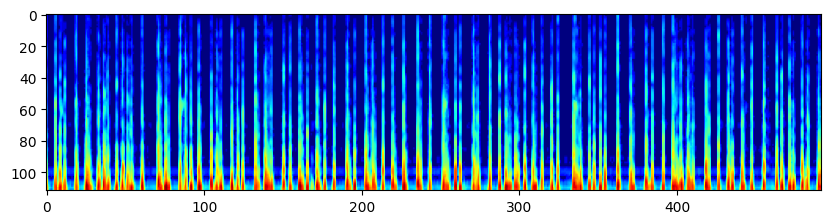

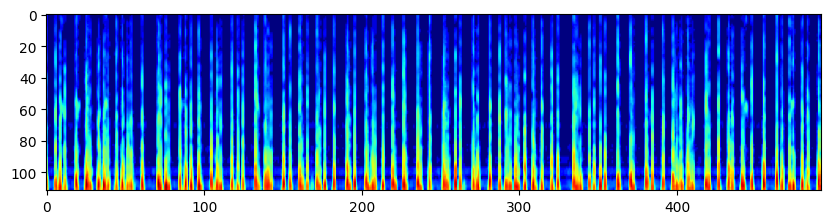

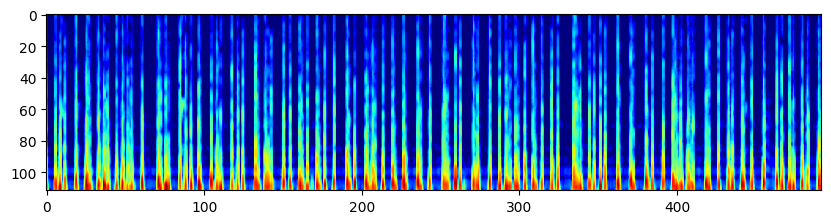

In [5]:
# randomly select a row in the train_df
sample_row = train_df.sample().iloc[0]
print(sample_row)
test_long_spec_dir = "/home/maxc/workspace/kaggle-hms/hms-harmful-brain-activity-classification/train_spectrograms"

# random select a spectrogram from the list

test_spec_id = sample_row["spectrogram_id"]
# test_spec_id = 1927055704
# test_spec_id = 327428082
# test_spec_id = 1564580568
# test_spec_id = 2132470150
print(test_spec_id)
test_long_spec_path = os.path.join(test_long_spec_dir, str(test_spec_id) + ".parquet")
long_spec_dict = load_long_spec(test_long_spec_path)

for key in long_spec_dict.keys():
    print(key, long_spec_dict[key].shape)

resized_long_spec_dict = resize_long_spec_dict(long_spec_dict, 112)

for key in resized_long_spec_dict.keys():
    print(key, resized_long_spec_dict[key].shape)
    img = resized_long_spec_dict[key]
    print(img.min(), img.max())
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap="jet")

In [6]:
long_spec_output_dir = "/home/maxc/workspace/kaggle-hms/data/test_preproc/long_specs"
long_spec_input_dir = "/home/maxc/workspace/kaggle-hms/hms-harmful-brain-activity-classification/train_spectrograms"
preprocess_long_spec_list(long_spec_input_dir, test_spec_list, long_spec_output_dir, 112)

{'signal_height': 112, 'freq': 0.5, 'sub_width': 300}


100%|██████████| 10/10 [00:00<00:00, 14037.16it/s]


## EEG Spec


eeg_id                              1870817419
eeg_sub_id                                   3
eeg_label_offset_seconds                  18.0
spectrogram_id                      1841924655
spectrogram_sub_id                           4
spectrogram_label_offset_seconds          92.0
label_id                            3889889903
patient_id                               23828
expert_consensus                         Other
seizure_vote                                 0
lpd_vote                                     0
gpd_vote                                     0
lrda_vote                                    0
grda_vote                                    2
other_vote                                  14
Name: 90505, dtype: object
/home/maxc/workspace/kaggle-hms/hms-harmful-brain-activity-classification/train_eegs/1870817419.parquet
LL (100, 2440)
RL (100, 2440)
LP (100, 2440)
RP (100, 2440)
ML (100, 2440)
LL (100, 2440)
RL (100, 2440)
LP (100, 2440)
RP (100, 2440)
ML (100, 2440)
LL (100, 1220)

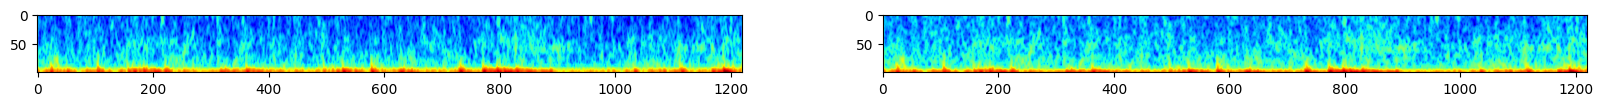

RL (100, 1220)
-0.55707157 0.50544345


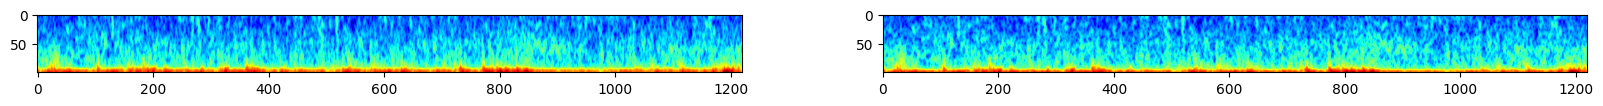

LP (100, 1220)
-0.5554358 0.511461


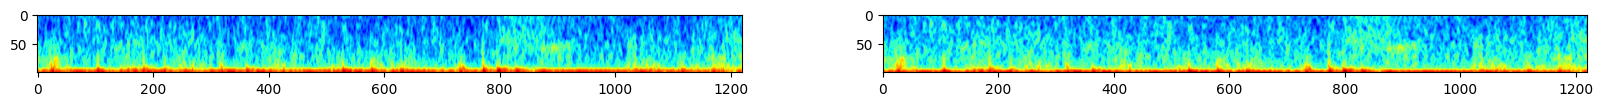

RP (100, 1220)
-0.5789099 0.52632195


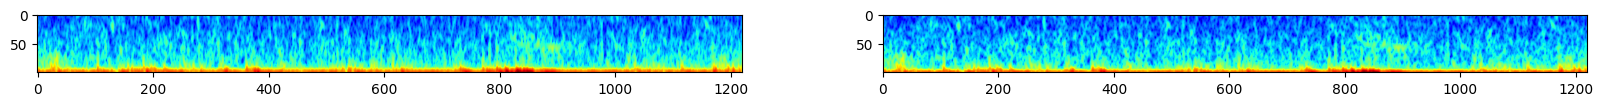

ML (100, 1220)
-0.7369026 0.56970286


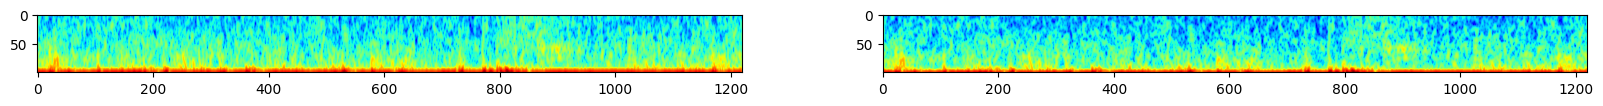

In [7]:

test_eeg_dir = "/home/maxc/workspace/kaggle-hms/hms-harmful-brain-activity-classification/train_eegs"

sample_row = train_df.sample().iloc[0]
print(sample_row)
test_long_spec_dir = "/home/maxc/workspace/kaggle-hms/hms-harmful-brain-activity-classification/train_spectrograms"

# random select a spectrogram from the list

test_eeg = sample_row["eeg_id"]
# test_eeg = 1057623030
test_eeg_path = os.path.join(test_eeg_dir, str(test_eeg) + ".parquet")
print(test_eeg_path)


gf = 20
eeg_spec_dict = load_eeg_spec(test_eeg_path, height=100, gen_freq = gf, n_fft = 1024, win_length=160, prefilter=False, lowcut=0.5)

eeg_spec_dict_1 = load_eeg_spec(test_eeg_path, height=100, gen_freq=20, n_fft = 1024, win_length=200, prefilter=False, lowcut=0.5)
for key in eeg_spec_dict_1.keys():
    print(key, eeg_spec_dict_1[key].shape)

resized_eeg_spec_dict_1 = resize_eeg_spec_dict(eeg_spec_dict_1, freq = 10, gen_freq=20)

for key in eeg_spec_dict.keys():
    print(key, eeg_spec_dict[key].shape)

resized_eeg_spec_dict = resize_eeg_spec_dict(eeg_spec_dict, freq = 10, gen_freq=gf)
for key in resized_eeg_spec_dict.keys():
    print(key, resized_eeg_spec_dict[key].shape)
    img_0 = resized_eeg_spec_dict[key]
    plt.figure(figsize=(20, 10))
    img = resized_eeg_spec_dict[key]
    print(img.min(), img.max())

    # show img side by side
    plt.subplot(1, 2, 1)
    plt.imshow(resized_eeg_spec_dict[key], cmap="jet")
    plt.subplot(1, 2, 2)
    plt.imshow(resized_eeg_spec_dict_1[key], cmap="jet")

    plt.show()
    # break



In [8]:
test_spec_output_dir = "/home/maxc/workspace/kaggle-hms/data/test_preproc/eeg_specs"
test_eeg_list = train_df["eeg_id"].unique()[:10]

preprocess_eeg_spec_list(eeg_dir, test_eeg_list, test_spec_output_dir, signal_height=112, sub_width=200)

{'signal_height': 112, 'hop': 2, 'freq': 4, 'gen_freq': 100, 'sub_width': 200, 'gen_width': 5000, 'lowcut': 0, 'prefilter': False, 'n_fft': 1024, 'win_length': 1024}


100%|██████████| 10/10 [00:00<00:00, 9173.89it/s]


## Gen full dataset

In [10]:
train_df = pd.read_csv(train_df_path)
eeg_ids = train_df["eeg_id"].unique()

# get the spec ids where the eeg_id is in the eeg_ids
train_df = train_df[train_df["eeg_id"].isin(eeg_ids)]
spec_ids = train_df["spectrogram_id"].unique()
input_eeg_dir = "/home/maxc/workspace/kaggle-hms/hms-harmful-brain-activity-classification/train_eegs"
input_spec_dir = "/home/maxc/workspace/kaggle-hms/hms-harmful-brain-activity-classification/train_spectrograms"

In [11]:
raw_eeg_output_dir = "/home/maxc/workspace/kaggle-hms/data/v6/raw_eegs_sosbandclip_2500_gnorm"
preprocess_raw_eeg_list(eeg_dir, eeg_ids, raw_eeg_output_dir, filter_type="sosbandclip", sub_width=2500, num_workers=-1, norm_type="global") 

{'filter_type': 'sosbandclip', 'freq': 50, 'sub_width': 2500, 'norm_type': 'global', 'highcut': 20}


100%|██████████| 17089/17089 [02:06<00:00, 135.35it/s]


In [14]:
long_spec_output_dir = "/home/maxc/workspace/kaggle-hms/data/v6/long_specs"
preprocess_long_spec_list(input_spec_dir, spec_ids, long_spec_output_dir, 100, num_workers=-1) # 4*100*300

{'signal_height': 100, 'freq': 0.5, 'sub_width': 300}


  0%|          | 0/11138 [00:00<?, ?it/s]

100%|██████████| 11138/11138 [00:52<00:00, 213.36it/s]


In [255]:
eeg_spec_output_dir = "/home/maxc/workspace/kaggle-hms/data/v6/eeg_specs_h100w250gf5fft1024wl200lc05_norm_const"
preprocess_eeg_spec_list(eeg_dir, eeg_ids, eeg_spec_output_dir, signal_height=100, sub_width=250, gen_freq=5, prefilter=False, num_workers=-1, n_fft=1024, win_length=200, lowcut=0.5)

{'signal_height': 100, 'hop': 40, 'freq': 5, 'gen_freq': 5, 'sub_width': 250, 'gen_width': 250, 'lowcut': 0.5, 'prefilter': False, 'n_fft': 1024, 'win_length': 200}


100%|██████████| 17089/17089 [06:18<00:00, 45.09it/s]
